In [9]:
import os
import pandas as pd

# Función para explorar el tamaño de la base de datos y enlistar columnas
def explorar_dataframe(archivo):
    df = pd.read_parquet(archivo)  # Cargar el archivo parquet
    print(f"Explorando el archivo: {archivo}")
    print(f"Tamaño del DataFrame: {df.shape}")  # Muestra el tamaño (filas, columnas)
    print("Columnas del DataFrame:", df.columns.tolist())  # Lista de nombres de columnas
    print("\n")

# Ruta de la carpeta donde se encuentran los archivos parquet
folder_path = '/home/nicolas/despliegue_analytica/files_parquet/'

# Listar archivos parquet en el directorio
archivos_en_directorio = os.listdir(folder_path)

# Filtrar solo los archivos parquet
archivos_parquet = [archivo for archivo in archivos_en_directorio if archivo.endswith('.parquet')]

# Explorar cada archivo
for archivo in archivos_parquet:
    explorar_dataframe(os.path.join(folder_path, archivo))  # Combina la ruta de la carpeta con el nombre del archivo


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/olist_order_reviews_dataset.parquet
Tamaño del DataFrame: (104162, 7)
Columnas del DataFrame: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/product_category_name_translation.parquet
Tamaño del DataFrame: (71, 2)
Columnas del DataFrame: ['product_category_name', 'product_category_name_english']


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/log.parquet
Tamaño del DataFrame: (1312162, 13)
Columnas del DataFrame: ['cep_id', 'cep', 'tipo', 'nome_logradouro', 'logradouro', 'bairro_id', 'cidade_id', 'estado', 'complemento', 'latitude', 'longitude', 'cep_ativo', 'cep_ibge']


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/olist_order_payments_dataset.parquet
Tamaño del DataFrame: (103886, 5)
Columnas de

In [2]:
import os
import pandas as pd

# Lista de posibles columnas clave para joins (identificadores comunes)
posibles_llaves = ['order_id', 'customer_id', 'product_id', 'seller_id', 'cep', 'cep_prefix']

# Función para explorar el tamaño de la base de datos y enlistar columnas, indicando posibles llaves para join
def explorar_dataframe(archivo):
    df = pd.read_parquet(archivo)  # Cargar el archivo parquet
    columnas = df.columns.tolist()  # Lista de columnas
    llaves_encontradas = [col for col in columnas if col in posibles_llaves]  # Identificar llaves para join
    
    print(f"Explorando el archivo: {archivo}")
    print(f"Tamaño del DataFrame: {df.shape}")  # Muestra el tamaño (filas, columnas)
    print("Columnas del DataFrame:", columnas)  # Lista de nombres de columnas
    
    if llaves_encontradas:
        print(f"Posibles llaves para JOIN: {llaves_encontradas}")  # Muestra llaves si se encuentran
    else:
        print("No se encontraron posibles llaves para JOIN.")
    print("\n")

# Ruta de la carpeta donde se encuentran los archivos parquet
folder_path = '/home/nicolas/despliegue_analytica/files_parquet/'

# Listar archivos parquet en el directorio
archivos_en_directorio = os.listdir(folder_path)

# Filtrar solo los archivos parquet
archivos_parquet = [archivo for archivo in archivos_en_directorio if archivo.endswith('.parquet')]

# Explorar cada archivo
for archivo in archivos_parquet:
    explorar_dataframe(os.path.join(folder_path, archivo))  # Combina la ruta de la carpeta con el nombre del archivo


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/olist_order_reviews_dataset.parquet
Tamaño del DataFrame: (104162, 7)
Columnas del DataFrame: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
Posibles llaves para JOIN: ['order_id']


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/product_category_name_translation.parquet
Tamaño del DataFrame: (71, 2)
Columnas del DataFrame: ['product_category_name', 'product_category_name_english']
No se encontraron posibles llaves para JOIN.


Explorando el archivo: /home/nicolas/despliegue_analytica/files_parquet/log.parquet
Tamaño del DataFrame: (1312162, 13)
Columnas del DataFrame: ['cep_id', 'cep', 'tipo', 'nome_logradouro', 'logradouro', 'bairro_id', 'cidade_id', 'estado', 'complemento', 'latitude', 'longitude', 'cep_ativo', 'cep_ibge']
Posibles llaves para JOIN: ['cep']


Explorando el archivo: /home/nicol

In [17]:
import dask.dataframe as dd

# Ruta de la carpeta donde se encuentran los archivos parquet
folder_path = '/home/nicolas/despliegue_analytica/files_parquet/'

# Cargar los archivos parquet como Dask DataFrames
df_order_reviews = dd.read_parquet(folder_path + 'olist_order_reviews_dataset.parquet')
df_payments = dd.read_parquet(folder_path + 'olist_order_payments_dataset.parquet')
df_order_items = dd.read_parquet(folder_path + 'olist_order_items_dataset.parquet')
df_customers = dd.read_parquet(folder_path + 'olist_customers_dataset.parquet')
df_products = dd.read_parquet(folder_path + 'olist_products_dataset.parquet')
df_sellers = dd.read_parquet(folder_path + 'olist_sellers_dataset.parquet')
df_orders = dd.read_parquet(folder_path + 'olist_orders_dataset.parquet')
df_log = dd.read_parquet(folder_path + 'log.parquet')

# Convertir las columnas a string donde sea necesario
df_log['cep'] = df_log['cep'].astype(str)

# Realizar los joins progresivamente usando Dask
# 1. Unir orders con customers por 'customer_id'
df = dd.merge(df_orders, df_customers, on='customer_id', how='left')

# 2. Unir order_reviews con orders por 'order_id'
df = dd.merge(df, df_order_reviews, on='order_id', how='left')

# 3. Unir payments con orders por 'order_id'
df = dd.merge(df, df_payments, on='order_id', how='left')

# 4. Unir order_items con orders por 'order_id'
df = dd.merge(df, df_order_items, on='order_id', how='left')

# 5. Unir products con order_items por 'product_id'
df = dd.merge(df, df_products, on='product_id', how='left')

# 6. Unir sellers con order_items por 'seller_id'
df = dd.merge(df, df_sellers, on='seller_id', how='left')

# 7. Unir log (llave: cep) con el DataFrame resultante
df = dd.merge(df, df_log[['cep', 'logradouro', 'bairro_id', 'cidade_id', 'estado']], 
              left_on='customer_zip_code_prefix', right_on='cep', how='left')

# Guardar el resultado en un nuevo archivo parquet
output_path = '/home/nicolas/despliegue_analytica/files_parquet/olist_dataset_combinado.parquet'
df.to_parquet(output_path, write_index=False)

print("Join completo y archivo guardado en:", output_path)



Join completo y archivo guardado en: /home/nicolas/despliegue_analytica/files_parquet/olist_dataset_combinado.parquet


In [37]:
import dask.dataframe as dd

# Cargar el archivo parquet como Dask DataFrame
folder_path = '/home/nicolas/despliegue_analytica/files_parquet/'
df_combined = dd.read_parquet(folder_path + 'olist_dataset_combinado.parquet')

# Tamaño del DataFrame
num_rows, num_cols = df_combined.shape
print("Número de filas:", num_rows.compute())  # Computa el número de filas
print("Número de columnas:", num_cols)  

# Estadísticas descriptivas
stats = df_combined.describe()
print("Estadísticas descriptivas:\n", stats.compute())  # Computa las estadísticas y las muestra

# Para ver las primeras filas del DataFrame
print("Primeras filas del DataFrame:\n", df_combined.head())  # Muestra las primeras filas

# Conteo de valores nulos por columna
null_counts = df_combined.isnull().sum().compute()
print("Conteo de valores nulos por columna:\n", null_counts)

# Tipos de variables
dtypes = df_combined.dtypes  # Obtiene los tipos de variables
print("Tipos de variables:\n", dtypes)  # Muestra los tipos de variables 



Número de filas: 119143
Número de columnas: 44
Estadísticas descriptivas:
             order_purchase_timestamp           order_approved_at  \
count                         119143                      118966   
min              2016-09-05 00:15:19         2016-09-15 15:16:38   
25%    2017-09-17 20:05:23.750000128  2017-09-19 02:41:29.500000   
50%              2018-01-24 23:06:24         2018-01-25 11:05:25   
75%              2018-05-07 23:48:25         2018-05-08 07:49:49   
max              2018-10-17 20:30:18         2018-09-03 20:40:06   
mean                            <NA>                        <NA>   
std                             <NA>                        <NA>   

      order_delivered_carrier_date order_delivered_customer_date  \
count                       117057                        115722   
min            2016-10-08 13:34:01           2016-10-11 16:46:32   
25%            2017-09-21 22:17:58           2017-10-03 21:53:05   
50%            2018-01-29 23:52:38      

Número de filas: 119143
Número de columnas: 44
<class 'dask.dataframe.core.DataFrame'>
Columns: 44 entries, order_id to estado
dtypes: datetime64[ns](6), float64(3), int32(12), string(23)None
      order_purchase_timestamp           order_approved_at  \
count                   119143                      118966   
min        2016-09-05 00:15:19         2016-09-15 15:16:38   
25%        2017-09-10 23:15:46  2017-09-11 18:50:48.500000   
50%        2018-01-17 13:59:12         2018-01-17 18:49:49   
75%        2018-05-03 16:18:30         2018-05-03 19:56:53   
max        2018-10-17 20:30:18         2018-09-03 20:40:06   
mean                      <NA>                        <NA>   
std                       <NA>                        <NA>   

      order_delivered_carrier_date  order_delivered_customer_date  \
count                       117057                         115722   
min            2016-10-08 13:34:01            2016-10-11 16:46:32   
25%            2017-09-14 22:52:12  2017-0

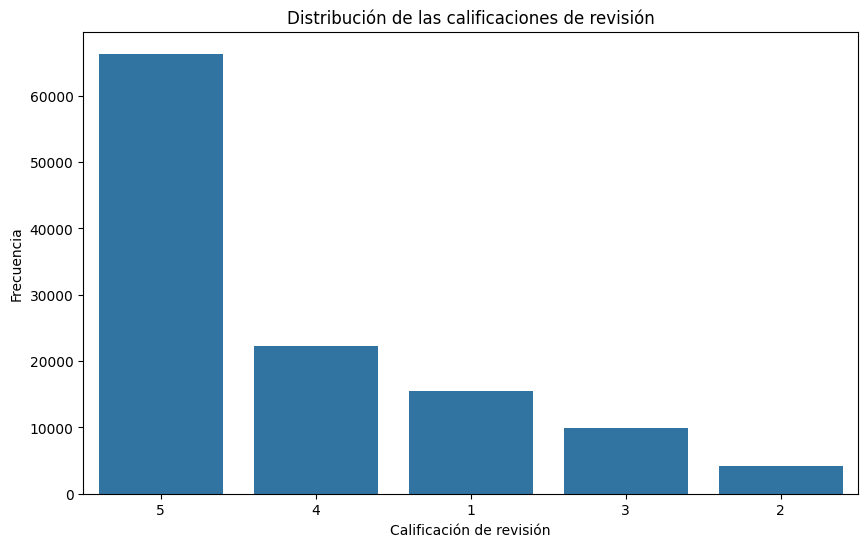

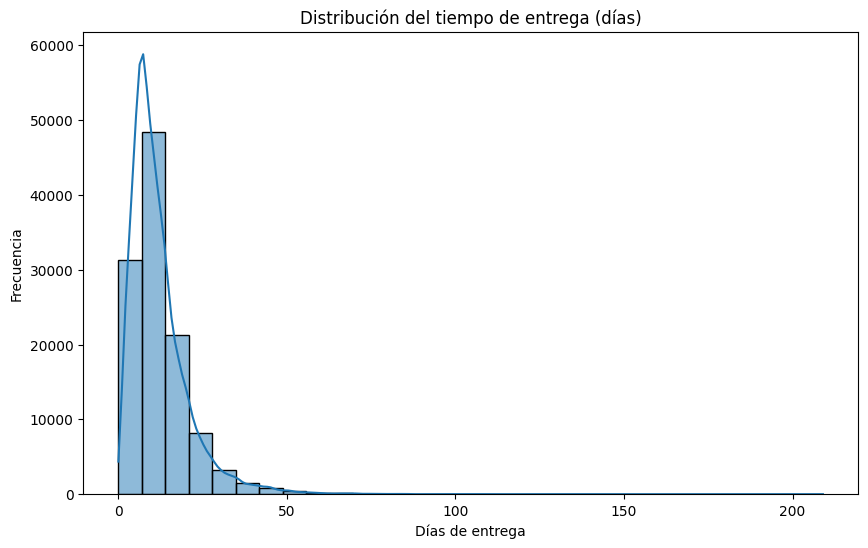

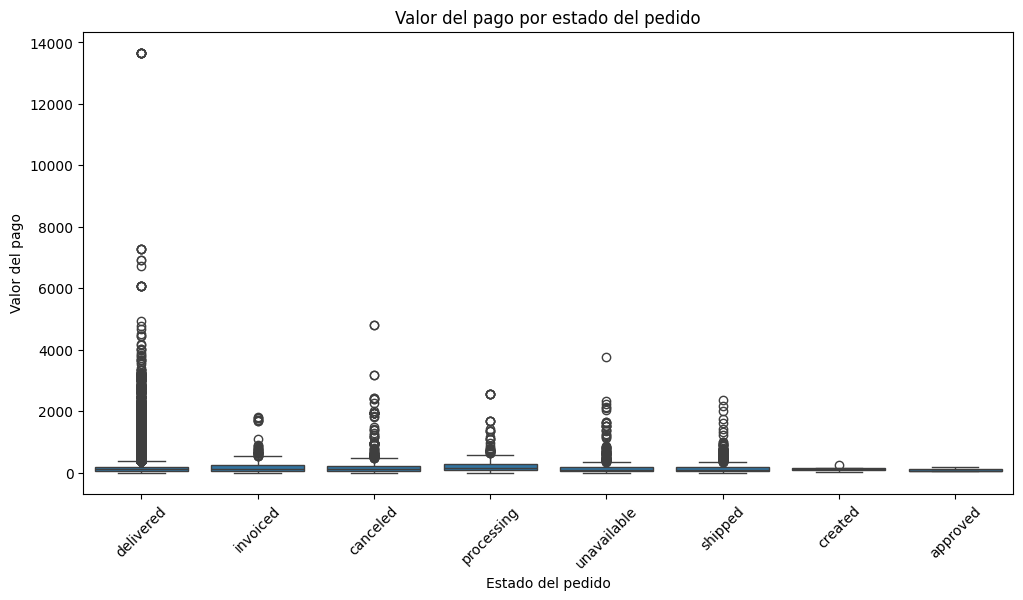

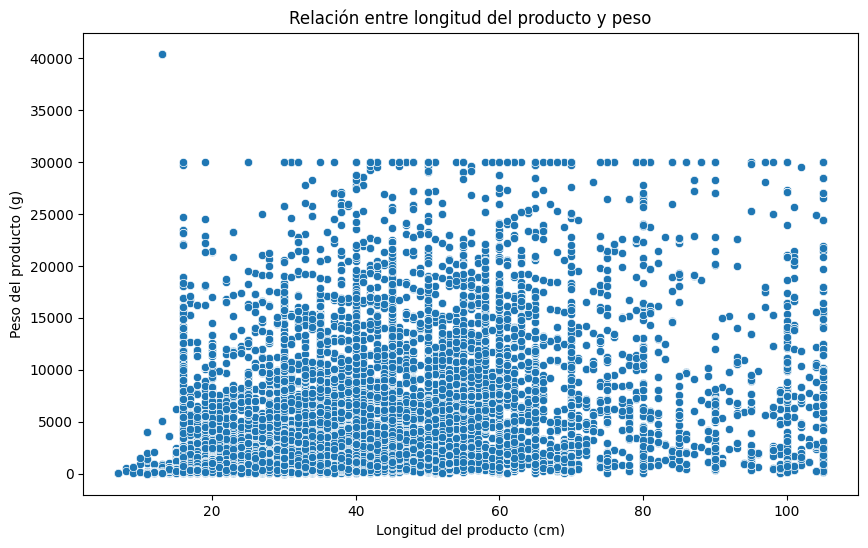

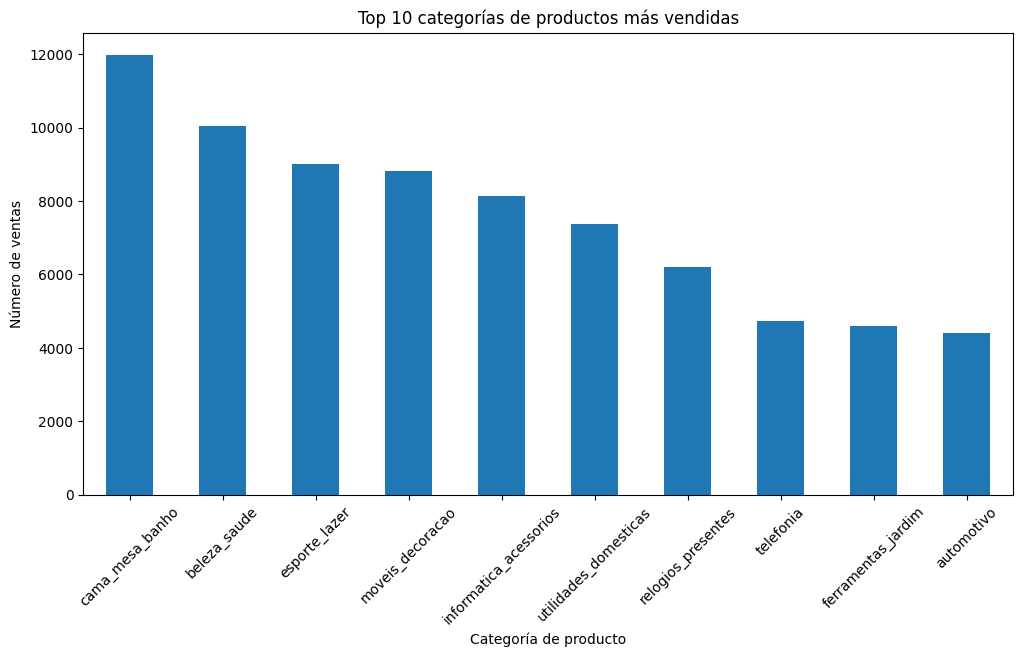

In [64]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la ruta del archivo Parquet
folder_path = '/home/nicolas/despliegue_analytica/files_parquet/'
df_combined = dd.read_parquet(folder_path + 'olist_dataset_combinado.parquet')

# Eliminar duplicados de todas las columnas al inicio
df_combined = df_combined.drop_duplicates().reset_index(drop=True)

# Comprobar si hay columnas duplicadas
duplicated_columns = df_combined.columns[df_combined.columns.duplicated()].unique()
if len(duplicated_columns) > 0:
    print(f"Columnas duplicadas encontradas: {duplicated_columns.tolist()}")
    # Eliminar o renombrar las columnas duplicadas si es necesario
    df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]  # Elimina duplicados

# 1. Visualizar las dimensiones del DataFrame
print(f"Número de filas: {df_combined.shape[0].compute()}")
print(f"Número de columnas: {df_combined.shape[1]}")

# 2. Obtener información general sobre el DataFrame
print(df_combined.info())

# 3. Describir las estadísticas descriptivas de las columnas numéricas
print(df_combined.describe().compute())

# 4. Ver las primeras filas del DataFrame
print(df_combined.head()) 

# 5. Contar los valores nulos en cada columna
null_counts = df_combined.isnull().sum().compute()
print("Conteo de valores nulos por columna:")
print(null_counts[null_counts > 0])

# 6. Analizar la distribución de las calificaciones de revisión
if 'review_score' in df_combined.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='review_score', data=df_combined.compute())
    plt.title('Distribución de las calificaciones de revisión')
    plt.xlabel('Calificación de revisión')
    plt.ylabel('Frecuencia')
    plt.show()

# 7. Analizar el tiempo de entrega
if 'order_delivered_customer_date' in df_combined.columns and 'order_purchase_timestamp' in df_combined.columns:
    df_combined['delivery_time'] = (dd.to_datetime(df_combined['order_delivered_customer_date']) - 
                                     dd.to_datetime(df_combined['order_purchase_timestamp'])).dt.days
    plt.figure(figsize=(10, 6))
    sns.histplot(df_combined['delivery_time'].dropna().compute(), bins=30, kde=True)
    plt.title('Distribución del tiempo de entrega (días)')
    plt.xlabel('Días de entrega')
    plt.ylabel('Frecuencia')
    plt.show()

# 8. Relación entre el valor del pago y el estado del pedido
if 'payment_value' in df_combined.columns and 'order_status' in df_combined.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='order_status', y='payment_value', data=df_combined.compute())
    plt.title('Valor del pago por estado del pedido')
    plt.xlabel('Estado del pedido')
    plt.ylabel('Valor del pago')
    plt.xticks(rotation=45)
    plt.show()

# 9. Analizar la relación entre las dimensiones del producto y su peso
if 'product_weight_g' in df_combined.columns and 'product_length_cm' in df_combined.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='product_length_cm', y='product_weight_g', data=df_combined.compute())
    plt.title('Relación entre longitud del producto y peso')
    plt.xlabel('Longitud del producto (cm)')
    plt.ylabel('Peso del producto (g)')
    plt.show()

# 10. Agrupar por categoría de producto y contar
if 'product_category_name' in df_combined.columns:
    category_counts = df_combined['product_category_name'].value_counts().compute()
    plt.figure(figsize=(12, 6))
    category_counts.head(10).plot(kind='bar')
    plt.title('Top 10 categorías de productos más vendidas')
    plt.xlabel('Categoría de producto')
    plt.ylabel('Número de ventas')
    plt.xticks(rotation=45)
    plt.show()



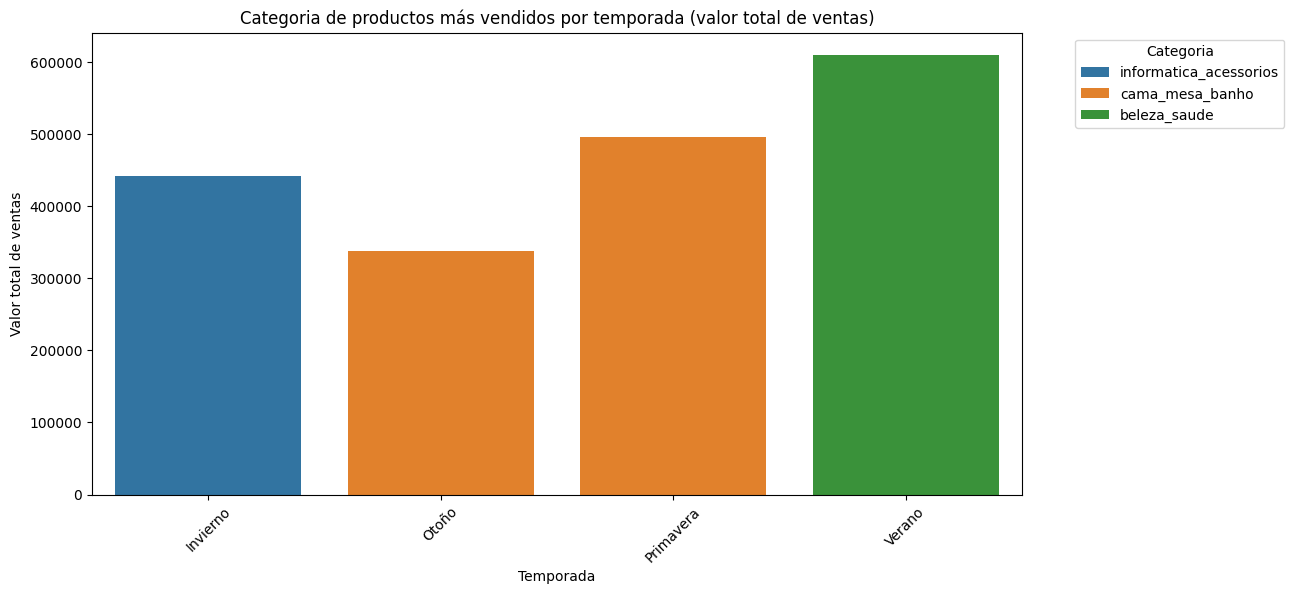

In [102]:
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la ruta del archivo Parquet
folder_path = '/home/nicolas/despliegue_analytica/files_parquet/'
df_combined = dd.read_parquet(folder_path + 'olist_dataset_combinado.parquet')

# Asegurarse de que las fechas están en formato datetime
df_combined['order_purchase_timestamp'] = dd.to_datetime(df_combined['order_purchase_timestamp'])

# Extraer el mes
df_combined['month'] = df_combined['order_purchase_timestamp'].dt.month

# Función para asignar la temporada
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# Aplicar la función para crear la columna de temporada
df_combined['season'] = df_combined['month'].apply(assign_season, meta=('season', 'object'))

# Calcular el valor total de ventas
df_combined['total_value'] = df_combined['payment_value']

# Agrupar por temporada y categoria, y sumar las ventas
seasonal_sales = df_combined.groupby(['season', 'product_category_name'])['total_value'].sum().reset_index()

# Crear un índice único en el DataFrame usando map_partitions
seasonal_sales['temp_index'] = seasonal_sales.map_partitions(lambda df: np.arange(len(df)), meta=('temp_index', 'int'))

# Establecer el índice único
seasonal_sales = seasonal_sales.set_index('temp_index')

# Calcular los índices de los productos más vendidos por temporada
idx_max = seasonal_sales.groupby('season')['total_value'].idxmax().compute()

# Obtener los productos más vendidos por temporada usando los índices calculados
top_products = seasonal_sales.loc[idx_max].compute().reset_index(drop=True)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='season', y='total_value', hue='product_category_name')
plt.title('Categoria de productos más vendidos por temporada (valor total de ventas)')
plt.xlabel('Temporada')
plt.ylabel('Valor total de ventas')
plt.xticks(rotation=45)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



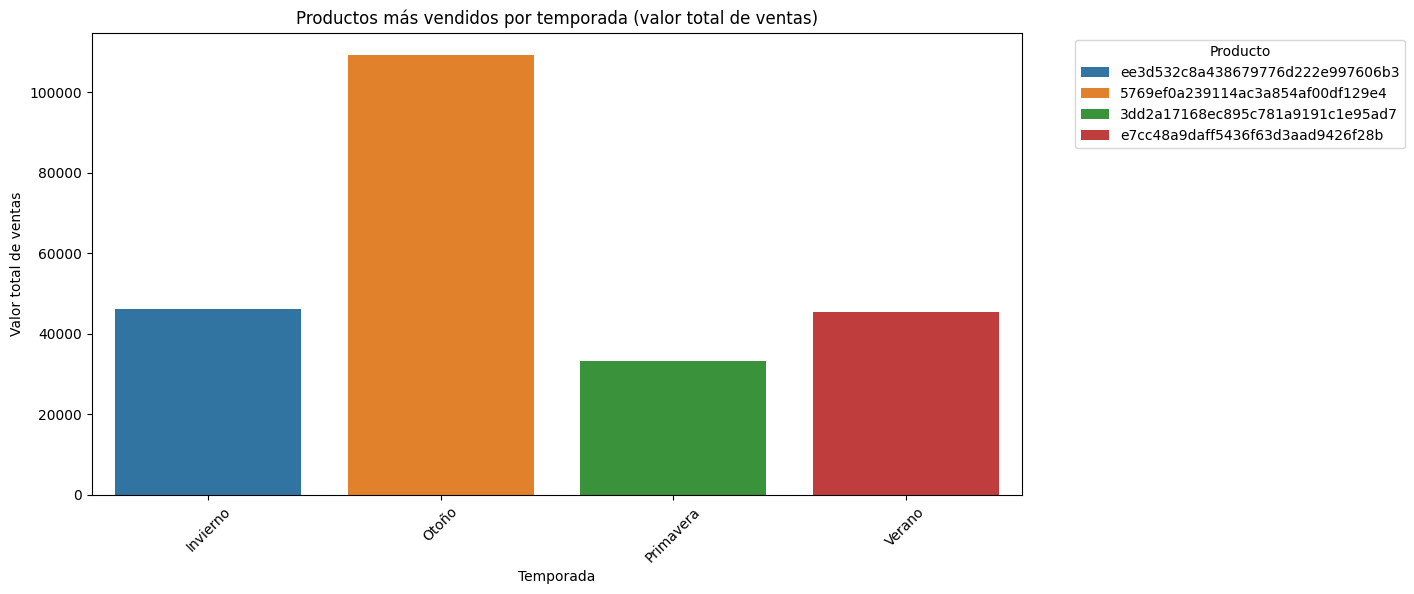

In [99]:
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la ruta del archivo Parquet
folder_path = '/home/nicolas/despliegue_analytica/files_parquet/'
df_combined = dd.read_parquet(folder_path + 'olist_dataset_combinado.parquet')

# Asegurarse de que las fechas están en formato datetime
df_combined['order_purchase_timestamp'] = dd.to_datetime(df_combined['order_purchase_timestamp'])

# Extraer el mes
df_combined['month'] = df_combined['order_purchase_timestamp'].dt.month

# Función para asignar la temporada
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

# Aplicar la función para crear la columna de temporada
df_combined['season'] = df_combined['month'].apply(assign_season, meta=('season', 'object'))

# Calcular el valor total de ventas
df_combined['total_value'] = df_combined['payment_value']

# Agrupar por temporada y producto, y sumar las ventas
seasonal_sales = df_combined.groupby(['season', 'product_id'])['total_value'].sum().reset_index()

# Crear un índice único en el DataFrame usando map_partitions
seasonal_sales['temp_index'] = seasonal_sales.map_partitions(lambda df: np.arange(len(df)), meta=('temp_index', 'int'))

# Establecer el índice único
seasonal_sales = seasonal_sales.set_index('temp_index')

# Calcular los índices de los productos más vendidos por temporada
idx_max = seasonal_sales.groupby('season')['total_value'].idxmax().compute()

# Obtener los productos más vendidos por temporada usando los índices calculados
top_products = seasonal_sales.loc[idx_max].compute().reset_index(drop=True)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='season', y='total_value', hue='product_id')
plt.title('Productos más vendidos por temporada (valor total de ventas)')
plt.xlabel('Temporada')
plt.ylabel('Valor total de ventas')
plt.xticks(rotation=45)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
